# Data Importing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_train.csv to Titanic_train.csv


In [ ]:
data = pd.read_csv(list(uploaded.keys())[0])

In [ ]:
data.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# EDA

### Null Values

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


From the details it is evident that there are null values

### Duplicates

In [ ]:
data.duplicated().sum()

np.int64(0)

There are no duplicated in the data

### Data Distribution

In [ ]:
#Distribution of Data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### Unique values in all features

In [ ]:
ncounts = data.nunique().sort_values(ascending = True)
ncounts

,0
Survived,2
Sex,2
Pclass,3
Embarked,3
Parch,7
SibSp,7
Age,88
Cabin,147
Fare,248
Ticket,681


### Data info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Survived and Not Survived Count

In [ ]:
data['Survived'].value_counts()

,count
Survived,
0,549
1,342


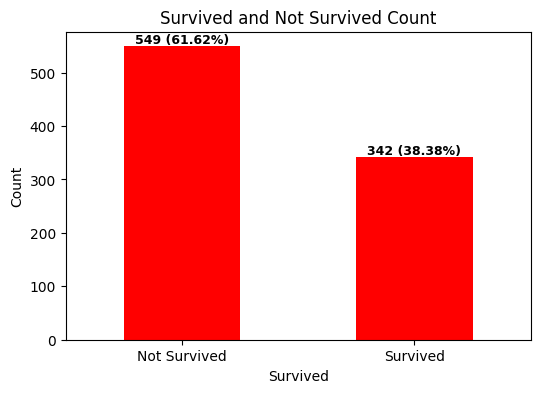

In [ ]:
plt.figure(figsize =(6,4))
counts = data['Survived'].value_counts()
baar = counts.plot(kind = 'bar', color = 'red')
plt.xticks(np.arange(2), ('Not Survived', 'Survived'))

for i, val in enumerate(counts):
  baar.text(i,val, f'{val} ({val/counts.sum():.2%})', ha = 'center', va= 'bottom',
            fontsize =9, fontweight ='bold')

plt.xticks(rotation = 0)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survived and Not Survived Count', fontsize = 12)
plt.show()

In [ ]:
df = data.copy()

In [ ]:
survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]

### Survived & Not Survived Passenger Class

In [ ]:
print(f"Survived Passenger Class : {df[df['Survived'] == 1]['Pclass'].value_counts().sort_index()}")
print("-"*10)

print(f"Not Survived Passenger Class : {df[df['Survived'] == 0]['Pclass'].value_counts().sort_index()}")

Survived Passenger Class : Pclass
1    136
2     87
3    119
Name: count, dtype: int64
----------
Not Survived Passenger Class : Pclass
1     80
2     97
3    372
Name: count, dtype: int64


In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<Figure size 800x600 with 0 Axes>

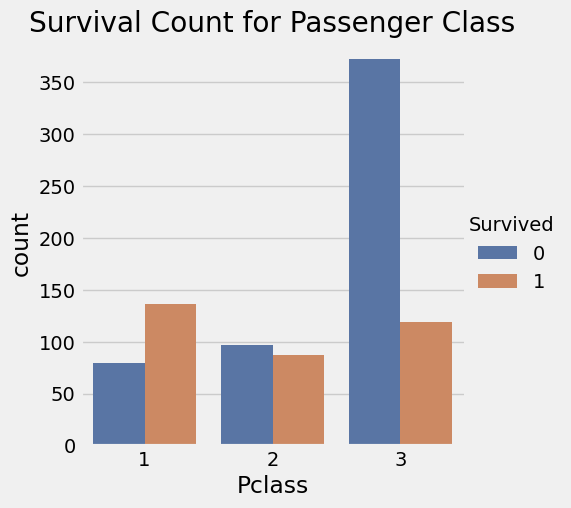

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8,6))
sns.catplot(data = df, x='Pclass', kind ='count', hue = 'Survived', palette = 'deep')
plt.title('Survival Count for Passenger Class')
plt.show()

In [ ]:
pclassproportion = df['Survived'].groupby(df['Pclass']).value_counts(normalize = True).sort_index()
pclassproportion

Pclass  Survived
1       0           0.370370
        1           0.629630
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: proportion, dtype: float64

### Survived and Not Survived Boarded Location

In [ ]:
print(f"Survived EMbarked Location : {survived['Embarked'].value_counts()}")
print("-"*10)
print("\n")
print(f"Not Survived EMbarked Location : {not_survived['Embarked'].value_counts()}")

Survived EMbarked Location : Embarked
S    217
C     93
Q     30
Name: count, dtype: int64
----------


Not Survived EMbarked Location : Embarked
S    427
C     75
Q     47
Name: count, dtype: int64


In [ ]:
sns.palettes.SEABORN_PALETTES

{'deep': ['#4C72B0',
  '#DD8452',
  '#55A868',
  '#C44E52',
  '#8172B3',
  '#937860',
  '#DA8BC3',
  '#8C8C8C',
  '#CCB974',
  '#64B5CD'],
 'deep6': ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD'],
 'muted': ['#4878D0',
  '#EE854A',
  '#6ACC64',
  '#D65F5F',
  '#956CB4',
  '#8C613C',
  '#DC7EC0',
  '#797979',
  '#D5BB67',
  '#82C6E2'],
 'muted6': ['#4878D0', '#6ACC64', '#D65F5F', '#956CB4', '#D5BB67', '#82C6E2'],
 'pastel': ['#A1C9F4',
  '#FFB482',
  '#8DE5A1',
  '#FF9F9B',
  '#D0BBFF',
  '#DEBB9B',
  '#FAB0E4',
  '#CFCFCF',
  '#FFFEA3',
  '#B9F2F0'],
 'pastel6': ['#A1C9F4', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#FFFEA3', '#B9F2F0'],
 'bright': ['#023EFF',
  '#FF7C00',
  '#1AC938',
  '#E8000B',
  '#8B2BE2',
  '#9F4800',
  '#F14CC1',
  '#A3A3A3',
  '#FFC400',
  '#00D7FF'],
 'bright6': ['#023EFF', '#1AC938', '#E8000B', '#8B2BE2', '#FFC400', '#00D7FF'],
 'dark': ['#001C7F',
  '#B1400D',
  '#12711C',
  '#8C0800',
  '#591E71',
  '#592F0D',
  '#A23582',
  '#3C3C3C',
  '#B8850A

<Figure size 800x600 with 0 Axes>

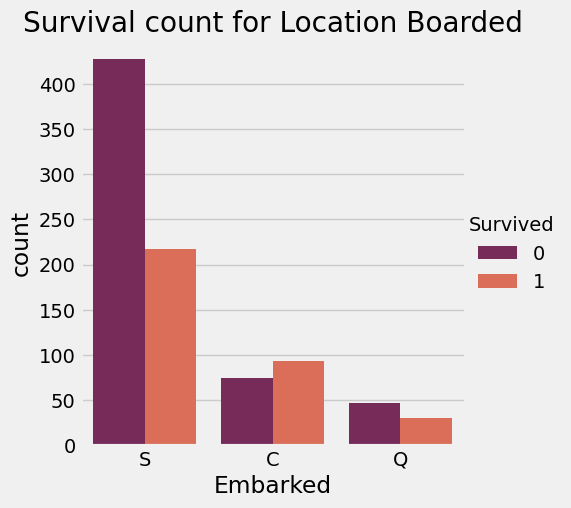

In [ ]:
plt.figure(figsize = (8,6))
sns.catplot(x = 'Embarked', data = df, kind = 'count', palette = 'rocket', hue = 'Survived')
plt.title('Survival count for Location Boarded')
plt.show()

### Survived & Not Survived on Age & Sex

In [ ]:
df['Age'].isnull().sum()

np.int64(177)

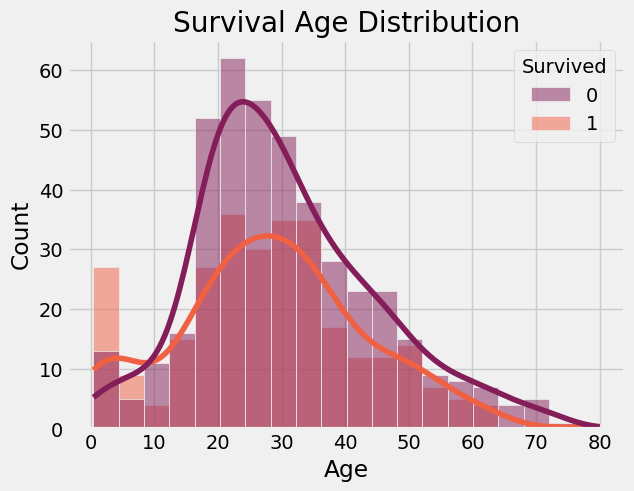

In [ ]:
sns.histplot(data = df, x = 'Age',  hue = 'Survived', kde = True, palette = 'rocket')
plt.title('Survival Age Distribution')
plt.show()

In [ ]:
df['AgeBin'] = pd.cut(df['Age'], bins = [0,12,18,35,60,np.inf],
                      labels = ['Child', 'Teenager', 'Young Adult', 'Adult','Senior'])

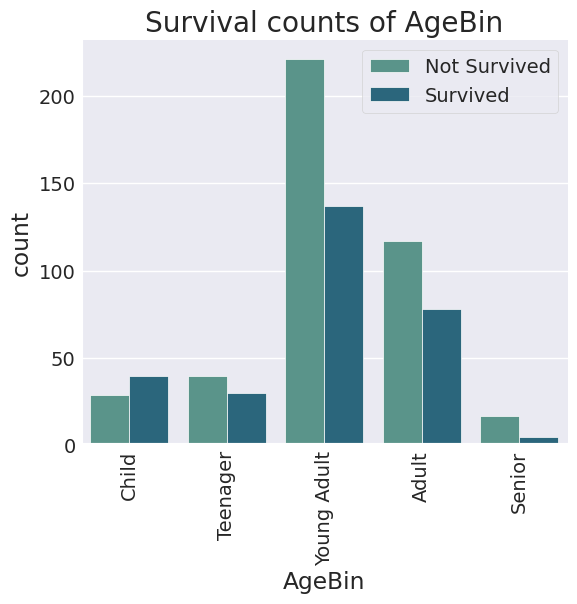

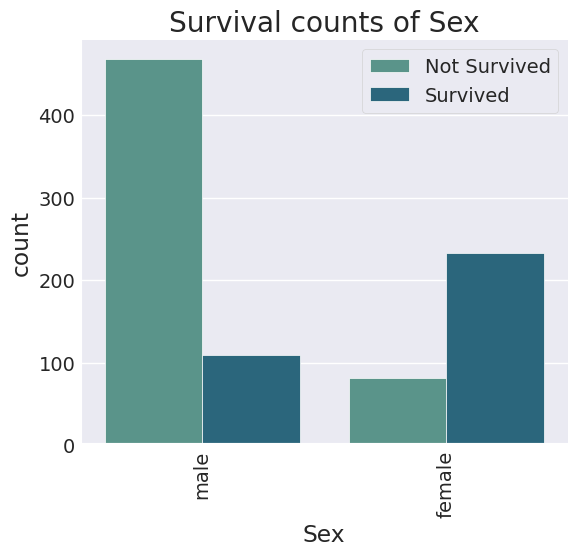

In [ ]:
cols = ['AgeBin', 'Sex']

for col in cols:
  sns.set_style('darkgrid')
  sns.catplot(data = df,  x = col, kind = 'count', hue = 'Survived',
            palette = 'crest', aspect= 1.2, height = 5,legend= False)
  plt.xticks(rotation = 90)
  plt.legend(labels =('Not Survived', 'Survived'))
  plt.title(f'Survival counts of {col}')
  plt.show()

In [ ]:
survived['Survived'].groupby(survived['Sex']).value_counts()

,,count
Sex,Survived,
female,1,233
male,1,109


In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult


### Survival rate of Age in Passenger Class

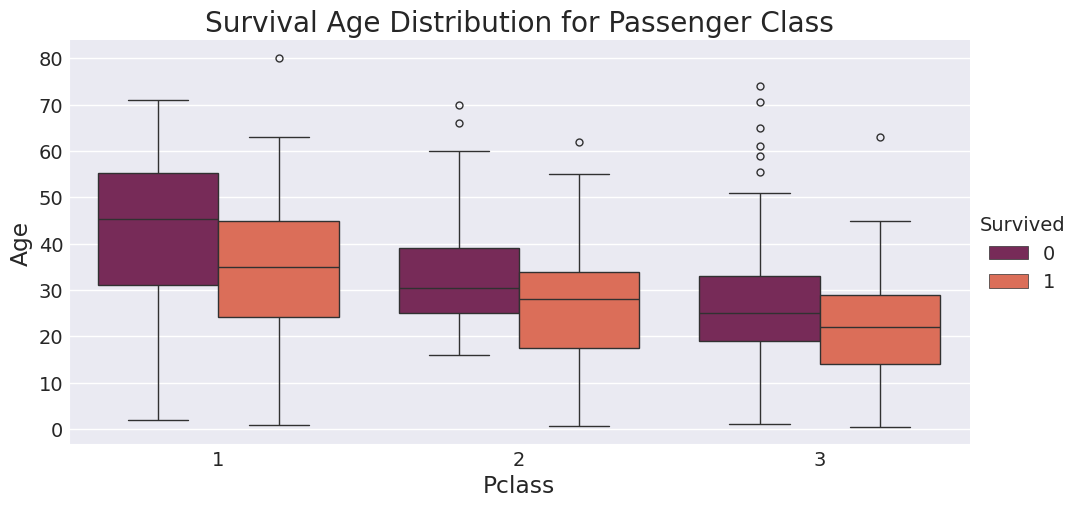

In [ ]:
sns.catplot(data = df, x= 'Pclass', y = 'Age', kind = 'box', hue = 'Survived',
            palette = 'rocket', aspect = 2, height = 5)
plt.title('Survival Age Distribution for Passenger Class')
plt.show()

### Fare Distribution with Pclass and Survival Rate

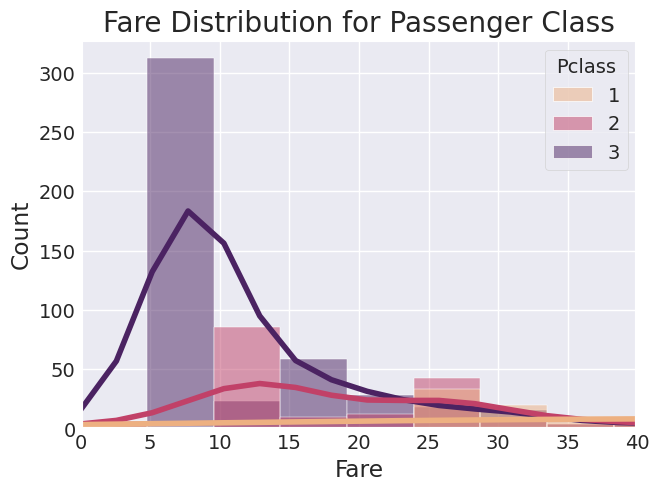

In [ ]:
sns.set_style('darkgrid')
sns.histplot(data = df, x ='Fare', hue ='Pclass', kde = True, palette = 'flare')
plt.xlim(0,40)
plt.title('Fare Distribution for Passenger Class')
plt.show()

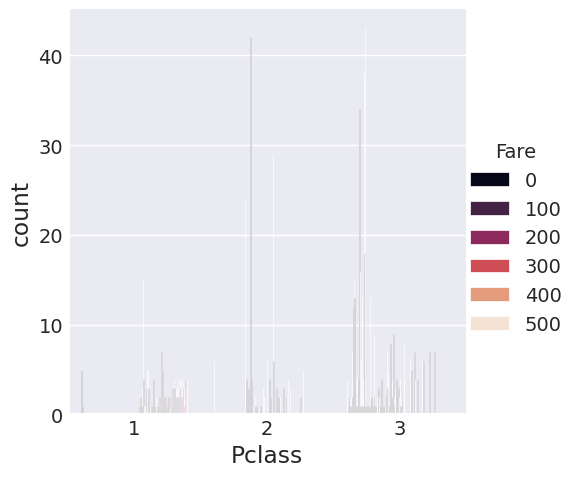

In [ ]:
sns.set_style('darkgrid')
sns.catplot(data = df, x= 'Pclass',kind = 'count',hue ='Fare', palette = 'rocket')
plt.show()

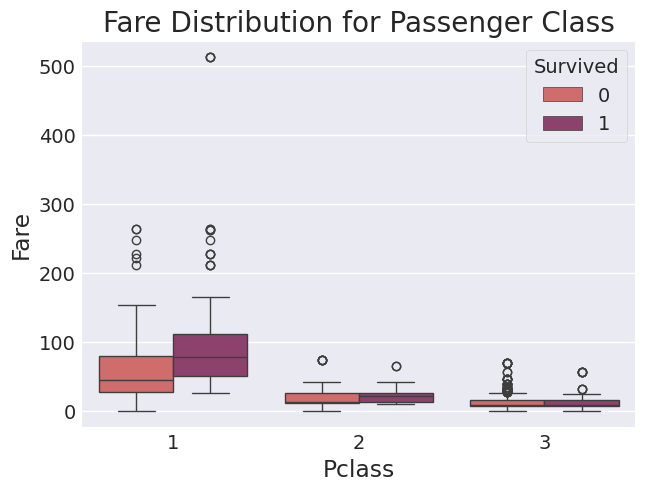

In [ ]:
sns.set_style('darkgrid')
sns.boxplot(data = df, x= 'Pclass', y = 'Fare',hue ='Survived', palette ='flare')
plt.title('Fare Distribution for Passenger Class')
plt.show()

In [ ]:
print(f" Median for Pclass 1 Survived :{df[(df['Survived'] == 1 ) & (df['Pclass'] == 1)]['Fare'].median()}")

print(f" Median for Pclass 2 Survived :{df[(df['Survived'] == 1 ) & (df['Pclass'] == 2)]['Fare'].median()}")

print(f" Median for Pclass 3 Survived :{df[(df['Survived'] == 1 ) & (df['Pclass'] == 3)]['Fare'].median()}")

print("\n")
print("-"*20)
print("\n")

print(f" Median for Pclass 1 Not Survived :{df[(df['Survived'] == 0 ) & (df['Pclass'] == 1)]['Fare'].median()}")

print(f" Median for Pclass 2 Not Survived :{df[(df['Survived'] == 0 ) & (df['Pclass'] == 2)]['Fare'].median()}")

print(f" Median for Pclass 3 Not Survived :{df[(df['Survived'] == 0 ) & (df['Pclass'] == 3)]['Fare'].median()}")


 Median for Pclass 1 Survived :77.9583
 Median for Pclass 2 Survived :21.0
 Median for Pclass 3 Survived :8.5167


--------------------


 Median for Pclass 1 Not Survived :44.75
 Median for Pclass 2 Not Survived :13.0
 Median for Pclass 3 Not Survived :8.05


### Fare Distribution with Pclass and Embarked ocation


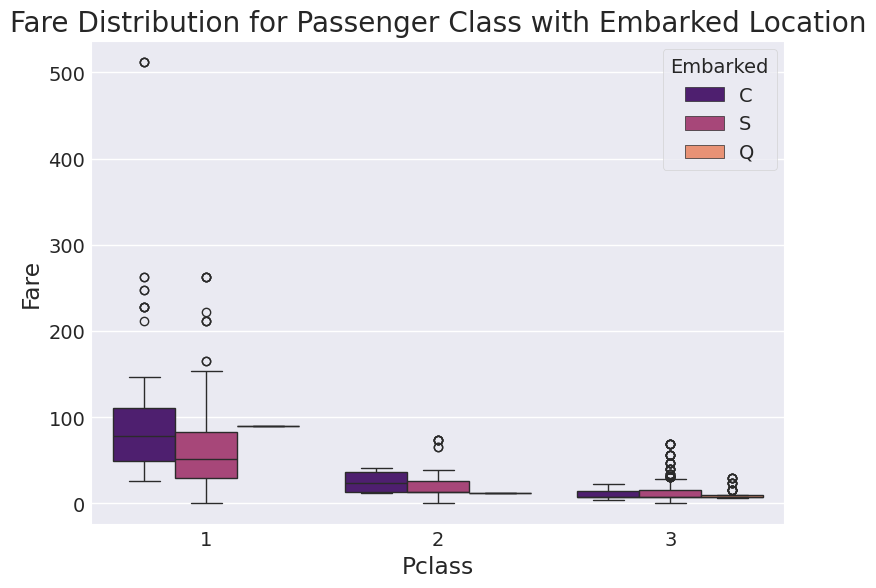

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize =(8,6))
sns.boxplot(data = df, x = 'Pclass', y = 'Fare', hue = 'Embarked', palette = 'magma',
            )
plt.title('Fare Distribution for Passenger Class with Embarked Location')
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

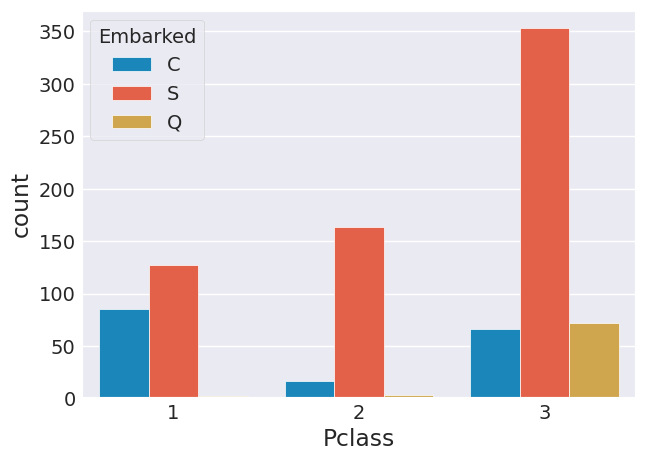

In [ ]:
sns.countplot(data = df, x = 'Pclass', hue = 'Embarked')

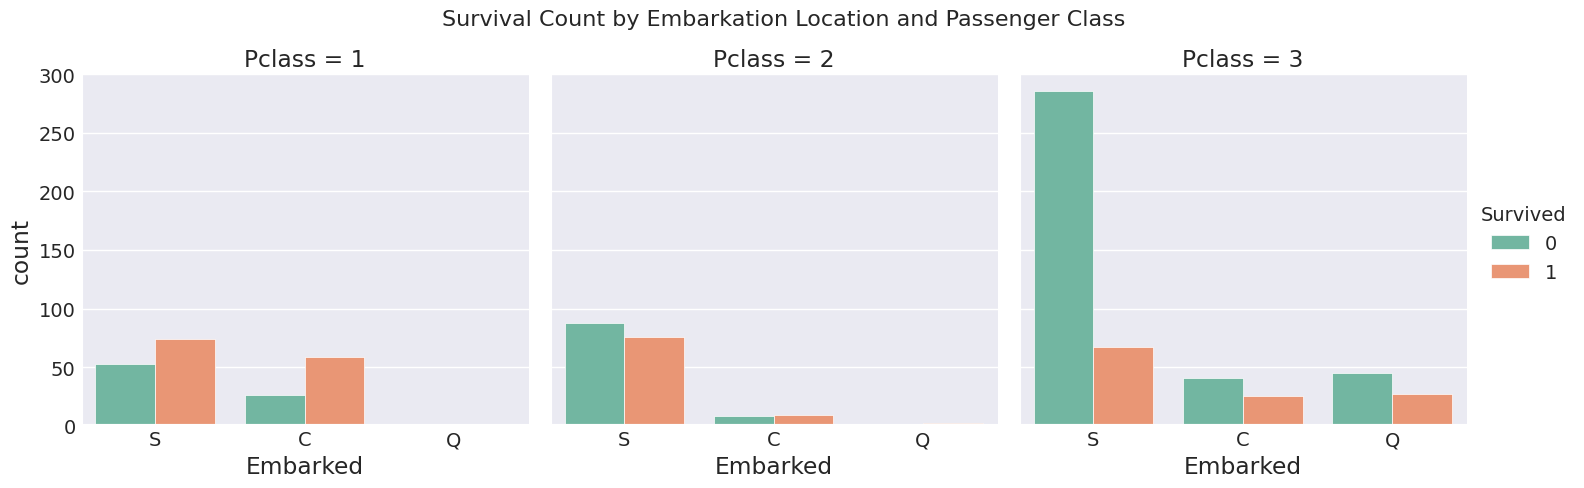

In [ ]:
sns.catplot(
    data=df, x='Embarked', hue='Survived', col='Pclass', kind='count',palette='Set2',
    height=5, aspect=1)
plt.subplots_adjust(top=0.85)
plt.suptitle('Survival Count by Embarkation Location and Passenger Class', fontsize=16)
plt.show()



### People Having cabins

In [ ]:
df['Cabin'].isnull().sum()

np.int64(687)

In [ ]:
df[df['Cabin'].notnull()]['Survived'].value_counts(normalize = True)

,proportion
Survived,
1,0.666667
0,0.333333


In [ ]:
df[(df['Cabin'].notnull()) & (df['Survived'] == 0)]['Pclass'].value_counts(normalize = True)

,proportion
Pclass,
1,0.867647
3,0.088235
2,0.044118


In [ ]:
df[(df['Cabin'].isnull()) & (df['Survived'] == 1)]['Pclass'].value_counts(normalize = True)

,proportion
Pclass,
3,0.548544
2,0.359223
1,0.092233


In [ ]:
df['Had_Cabin'] = df['Cabin'].notnull().astype('int')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin,Had_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Young Adult,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Young Adult,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Young Adult,1


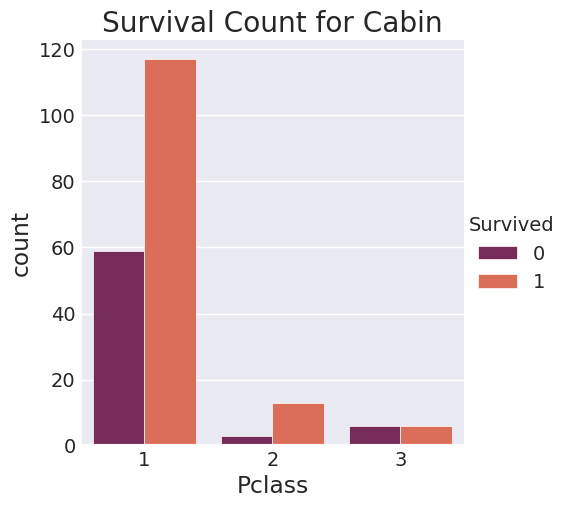

In [ ]:
filtered = df[df['Had_Cabin']== 1]
sns.set_style('darkgrid')
sns.catplot(data = filtered, x = 'Pclass' ,kind = 'count', hue = 'Survived', palette = 'rocket')
plt.title('Survival Count for Cabin')
plt.show()

# Data PreProcessing

In [ ]:
df1 = df.copy()

In [ ]:
df1['Sex'] = df1['Sex'].map({'female':0, 'male':1}).astype('int64')

In [ ]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin,Had_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0


In [ ]:
df1['Family_Size'] = df1['SibSp'] + df1['Parch'] +1

In [ ]:
df1[df1['Family_Size']>=3]['Family_Size'].value_counts().sum()

np.int64(193)

In [ ]:
df1[df1['Family_Size']>=3]['Cabin'].isnull().sum()

np.int64(149)

In [ ]:
df1['Age'] =df1.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [ ]:
df1['Age'].isnull().sum()

np.int64(0)

In [ ]:
df1[df1['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBin,Had_Cabin,Family_Size
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN,Adult,1,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN,Senior,1,1


In [ ]:
df1['Embarked'] = df1.groupby(['Pclass','Survived','Sex'])['Embarked'].transform(lambda x: x.fillna(x.mode()[0]))


In [ ]:
df1['Embarked'].isnull().sum()

np.int64(0)

In [ ]:
df1['AgeBin'] = pd.cut(df1['Age'],
                       bins = [0,12,18,35,60,np.inf],
                       labels = ['Child', 'Teenager', 'Young Adult', 'Adult','Senior'])

In [ ]:
df1['AgeBin'].isnull().sum()

np.int64(0)

In [ ]:
df1['Embarked'] = df1['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype('int64')

In [ ]:
df2 = df1.copy()

In [ ]:
df2.drop(['PassengerId','Name','Ticket','Cabin','AgeBin','SibSp','Parch'], axis = 1, inplace = True)

In [ ]:
df2.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Had_Cabin,Family_Size
0,0,3,1,22.0,7.2500,0,0,2
1,1,1,0,38.0,71.2833,1,1,2
2,1,3,0,26.0,7.9250,0,0,1
3,1,1,0,35.0,53.1000,0,1,2
4,0,3,1,35.0,8.0500,0,0,1


In [ ]:
df2['Age'] = df2['Age'].astype('int64')

In [ ]:
df2.dtypes

,0
Survived,int64
Pclass,int64
Sex,int64
Age,int64
Fare,float64
Embarked,int64
Had_Cabin,int64
Family_Size,int64


# Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [ ]:
df3 = df2.copy()

In [ ]:
X = df3.drop('Survived', axis = 1)
y = df3['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state= 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
yhat_train = model.predict(X_train_scaled)

In [ ]:
acs_train = accuracy_score(y_train, yhat_train)

print(f'Accuracy Score for Training Data : {acs_train:.2f}')


Accuracy Score for Training Data : 0.80


In [ ]:
auc_roc_train = roc_auc_score(y_train, yhat_train)

print(f'AUC ROC Score for Training Data : {auc_roc_train:.2f}')


AUC ROC Score for Training Data : 0.78


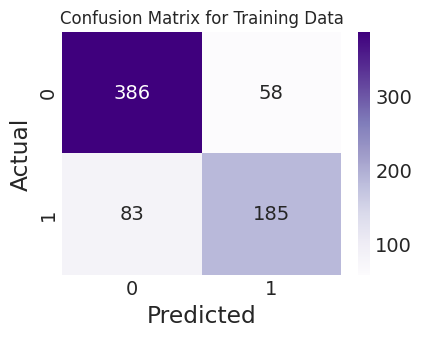

In [ ]:
cm_train = confusion_matrix(y_train, yhat_train)
plt.figure(figsize = (4,3))
sns.heatmap(cm_train, annot = True, fmt = 'd', cmap = 'Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Training Data', fontsize = 12)
plt.show()

In [ ]:
cr_train = classification_report(y_train, yhat_train)
print(f'Classification Report for Training data:\n {cr_train}')

Classification Report for Training data:
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       444
           1       0.76      0.69      0.72       268

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.80      0.80      0.80       712



In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

In [ ]:
yhat_train_prob = model.predict_proba(X_train_scaled)[:,1]

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_train, yhat_train_prob)

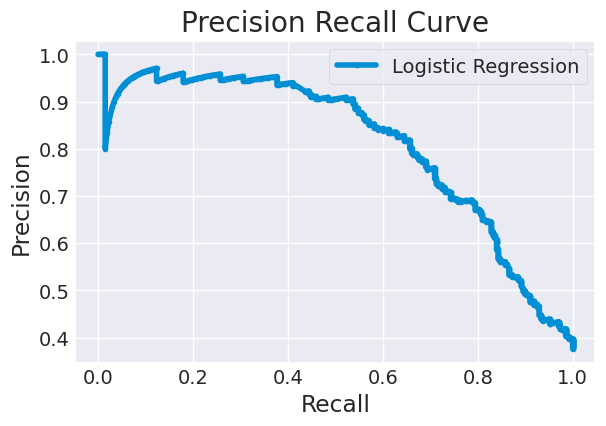

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(recall,precision, marker ='.', label = 'Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.grid(True)
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

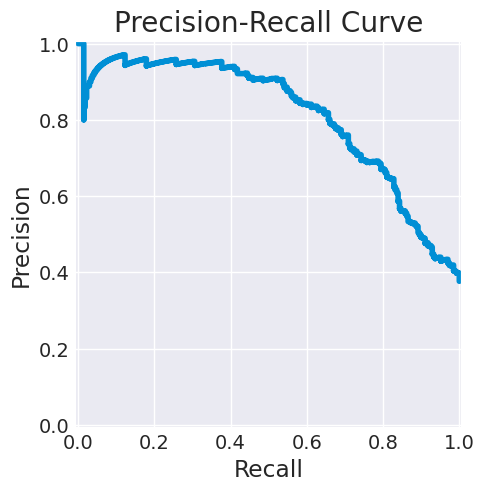

In [ ]:
plt.figure(figsize = (10,6))
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title('Precision-Recall Curve')
plt.show()

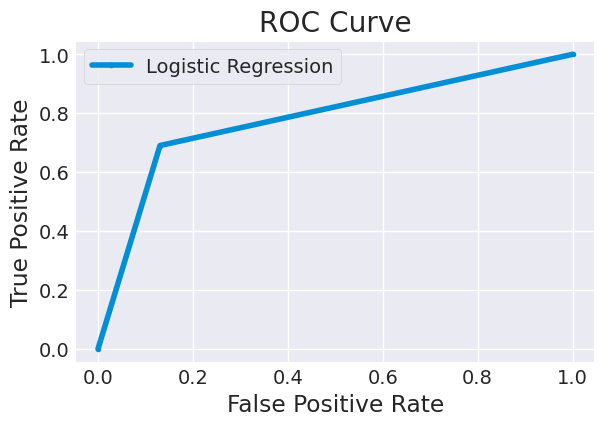

In [ ]:
plt.figure(figsize= (6,4))
fpr, tpr, thr = roc_curve(y_train, yhat_train)
plt.plot(fpr, tpr, marker ='.', label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
yhat_train_pred_cust = (yhat_train_prob>0.4).astype('int64')

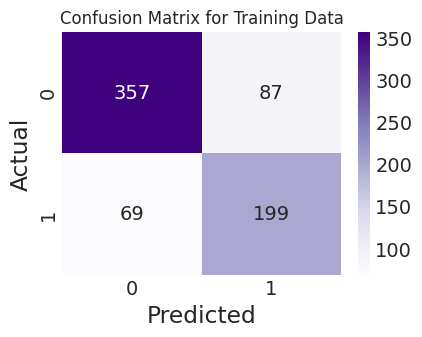

----------


Classification Report for train Data:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       444
           1       0.70      0.74      0.72       268

    accuracy                           0.78       712
   macro avg       0.77      0.77      0.77       712
weighted avg       0.78      0.78      0.78       712



In [ ]:
cm_yhat_train_pred_cust = confusion_matrix(y_train, yhat_train_pred_cust)
plt.figure(figsize = (4,3))
sns.heatmap(cm_yhat_train_pred_cust, annot = True, fmt = 'd', cmap = 'Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Training Data', fontsize = 12)
plt.show()

print("-"*10)
print("\n")
print(f'Classification Report for train Data:\n {classification_report(y_train,yhat_train_pred_cust)}')

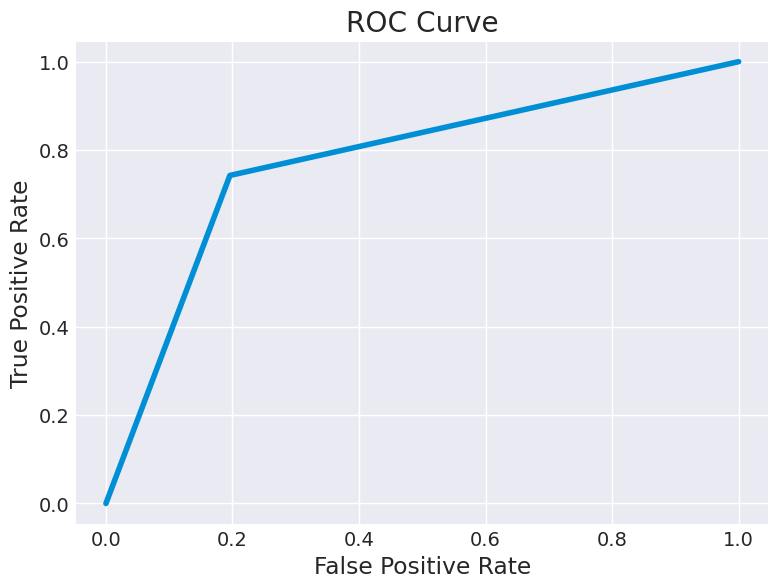

In [ ]:
plt.figure(figsize =(8,6))
fpr, tpr, thr = roc_curve(y_train, yhat_train_pred_cust)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

In [ ]:
print(f'Roc_Auc score :{roc_auc_score(y_train, yhat_train_pred_cust):.2f}')

Roc_Auc score :0.77


### Coefficients Interpretation & Significance of Features

In [ ]:
coef = model.coef_[0]
features = X.columns
odds_ratios = np.exp(coef)
interpretation= np.where(odds_ratios>1,'Increases survival odds',
                                     'Decreases survival odds')

coef_df = pd.DataFrame({
    'Features': features,
    'Coefficients': coef,
    'Odds Ratios': odds_ratios,
    'Interpretation':interpretation
})

In [ ]:
coef_df

,Features,Coefficients,Odds Ratios,Interpretation
0,Pclass,-0.682739,0.505231,Decreases survival odds
1,Sex,-1.274715,0.279511,Decreases survival odds
2,Age,-0.448256,0.638741,Decreases survival odds
3,Fare,0.112417,1.118980,Increases survival odds
4,Embarked,0.103414,1.108950,Increases survival odds
5,Had_Cabin,0.267936,1.307264,Increases survival odds
6,Family_Size,-0.399675,0.670538,Decreases survival odds


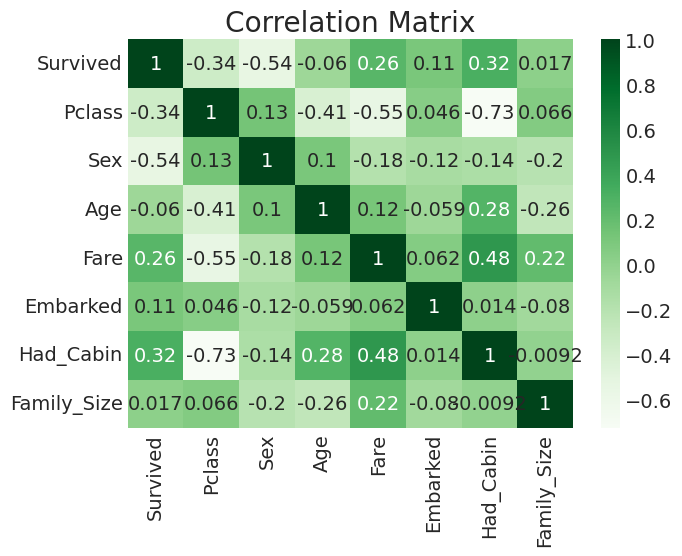

In [ ]:
sns.heatmap(df3.corr(), annot = True, cmap = 'Greens')
plt.title('Correlation Matrix')
plt.show()

Sex: It is the most significant predictor.
From the EDA and coeffiecients it was observed that Females had much higher survival rates due to evacuation priority.
Gender was a key determinant in survival strategy. So this feature decreases the survival odds.

Pclass: Pclass has a very good relation with the survival. From the EDA it was observed that people in 1st class had better survival rate beause of the preferences given (might be with lifeboats and etc). Socioeconomic status influenced the survival outcomes.

Age: This feature decrease the survival odds. Young people and Young adults are more in the passengers list. Though there are children and seniors on the ship but the proportions are less. So when a new passenger who is a senior or child has added, the model doesnt predicts weel. Hence the odds ratio tell the same by checking the importance given.

Fare: People who might have paid more got good chancesof survival because of the importance given to them. As they paid more, they might be in the top passenger classes. From the odds ratio, fare has given good importance in predicting the survival

Embarked: People who have boarded in C & Q have better survival rate. This feature has a good survival odds ratio to predict the survival.

Cabin: This feature too has a good survival odds ratio. People having a cabin had a good chance of survive. This feature can help in predicting the survival.

Family_Size: It has a moderate effect on the prediction. Families may have helped each other survive. But very large families might struggle to evacuate together.

### Model Prediction on Testing Data

In [ ]:
yhat_test = model.predict(X_test_scaled)

In [ ]:
acs_test = accuracy_score(y_test, yhat_test)
print(f'Accuracy Score for Testing Data : {acs_test:.2f}')

Accuracy Score for Testing Data : 0.82


In [ ]:
auc_roc_test = roc_auc_score(y_test, yhat_test)
print(f'AUC ROC Score for Testing Data : {auc_roc_test:.2f}')

AUC ROC Score for Testing Data : 0.80


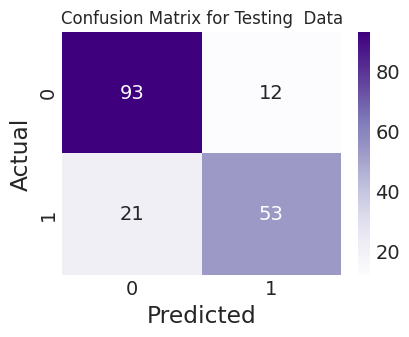

In [ ]:
cm_test = confusion_matrix(y_test, yhat_test)
plt.figure(figsize = (4,3))
sns.heatmap(cm_test, annot = True, fmt = 'd', cmap = 'Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Testing  Data', fontsize = 12)
plt.show()

In [ ]:
cr_test = classification_report(y_test, yhat_test)
print(f'Classification Report for Testing data:\n {cr_test}')

Classification Report for Testing data:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



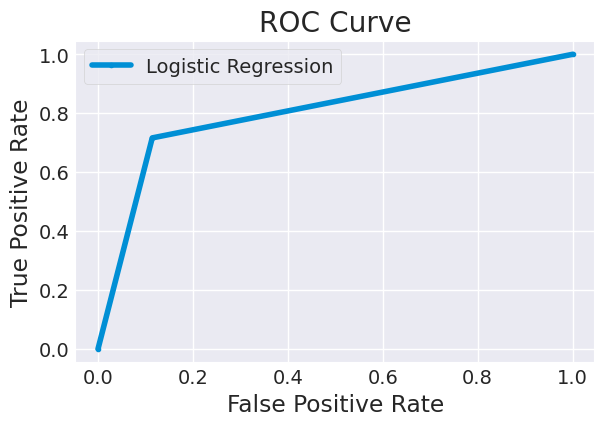

In [ ]:
plt.figure(figsize= (6,4))
fpr, tpr, thr = roc_curve(y_test, yhat_test)
plt.plot(fpr, tpr, marker ='.', label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
yhat_test_prob= model.predict_proba(X_test_scaled)[:,1]

In [ ]:
yhat_test_prob_cust = (yhat_test_prob>0.4).astype('int64')

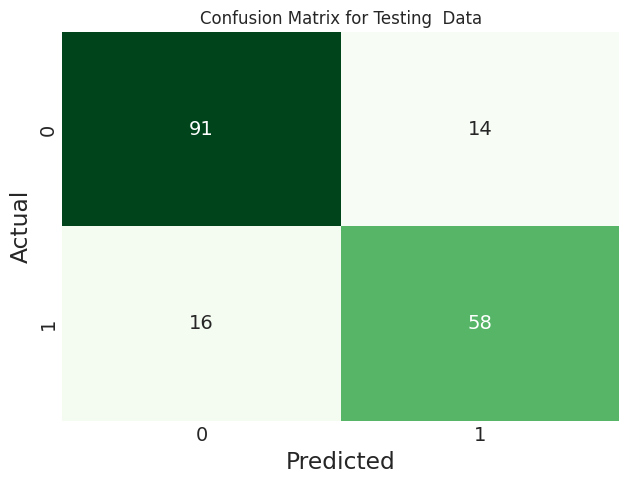

In [ ]:
cm_test_prob = confusion_matrix(y_test, yhat_test_prob_cust)
sns.heatmap(cm_test_prob, annot = True, fmt ='d', cmap ='Greens', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Testing  Data', fontsize = 12)
plt.show()

In [ ]:
cr_test_prob = classification_report(y_test, yhat_test_prob_cust)
print(f'Classification Report for Testing data:\n {cr_test_prob}')

Classification Report for Testing data:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       105
           1       0.81      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



/tmp/ipython-input-3754708992.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


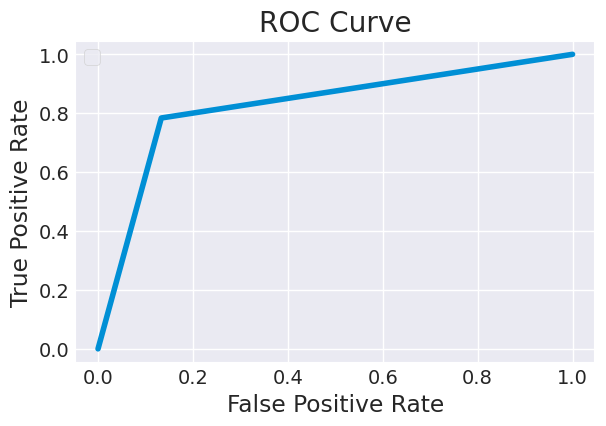

In [ ]:
fpr, tpr, thr = roc_curve(y_test, yhat_test_prob_cust)
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print(f'Roc_Auc score :{roc_auc_score(y_test, yhat_test_prob_cust):.2f}')

Roc_Auc score :0.83


# Model Building with Validation Data

In [ ]:
uploaded1 = files.upload()

Saving Titanic_test.csv to Titanic_test.csv


In [ ]:
df_test = pd.read_csv(list(uploaded1.keys())[0])

In [ ]:
dft = df_test.copy()

In [ ]:
dft.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
dft.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
dft.duplicated().sum()

np.int64(0)

In [ ]:
dft['Age'] = dft.groupby(['Pclass','Sex',])['Age'].transform(lambda x: x.fillna(x.median()))
dft['Age'].isnull().sum()

np.int64(0)

In [ ]:
dft['Had_Cabin'] = dft['Cabin'].notnull().astype('int64')
dft.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Had_Cabin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [ ]:
dft.Had_Cabin.value_counts()

,count
Had_Cabin,
0,327
1,91


In [ ]:
dft['Family_Size'] = dft['SibSp'] + dft['Parch'] + 1

In [ ]:
dft['Embarked'] = dft['Embarked'].map({'S':0, 'C':1 , 'Q':2}).astype('int64')

In [ ]:
dft['Sex'] = dft['Sex'].map({'female':0, 'male':1}).astype('int64')

In [ ]:
dft['Fare'].value_counts()

,count
Fare,
7.7500,21
26.0000,19
8.0500,17
13.0000,17
7.8958,11
...,...
13.8625,1
7.7208,1
90.0000,1


In [ ]:
dft['Fare'] = dft.groupby(['Pclass'])['Fare'].transform(lambda x: x.fillna(x.mode()[0]))

In [ ]:
dft1 = dft.copy()

In [ ]:
dft1.drop(['PassengerId','Name','Ticket','Cabin','SibSp','Parch'], axis = 1, inplace = True)

In [ ]:
dft1.head()

,Pclass,Sex,Age,Fare,Embarked,Had_Cabin,Family_Size
0,3,1,34.5,7.8292,2,0,1
1,3,0,47.0,7.0000,0,0,2
2,2,1,62.0,9.6875,2,0,1
3,3,1,27.0,8.6625,0,0,1
4,3,0,22.0,12.2875,0,0,3


In [ ]:
dft1.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
Fare,0
Embarked,0
Had_Cabin,0
Family_Size,0


### Model

In [ ]:
dft1_scaled = scaler.fit_transform(dft1)

In [ ]:
yhat_val = model.predict(dft1_scaled)

In [ ]:
yhat_val

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
yhat_val_prob = model.predict_proba(dft1_scaled)[:,1]

In [ ]:
dft1['Survived'] = (yhat_val_prob>0.4).astype('int64')

In [ ]:
dft1

,Pclass,Sex,Age,Fare,Embarked,Had_Cabin,Family_Size,Survived
0,3,1,34.5,7.8292,2,0,1,0
1,3,0,47.0,7.0000,0,0,2,0
2,2,1,62.0,9.6875,2,0,1,0
3,3,1,27.0,8.6625,0,0,1,0
4,3,0,22.0,12.2875,0,0,3,1
...,...,...,...,...,...,...,...,...
413,3,1,24.0,8.0500,0,0,1,0
414,1,0,39.0,108.9000,1,1,1,1
415,3,1,38.5,7.2500,0,0,1,0
416,3,1,24.0,8.0500,0,0,1,0


# Deployement

In [ ]:
import pickle

In [ ]:
# save model
with open('titanic_model.pkl','wb')as f:
  pickle.dump(model,f)

#save scaler
with open('X_train_scaled.pkl','wb')as f:
  pickle.dump(scaler,f)

In [ ]:
#Download the files
files.download('titanic_model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>